<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/6_1_BigData_PySpark_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка PySpark

In [ ]:
!apt-get update

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://downloads.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop2.7.tgz

In [ ]:
!tar -xvf spark-3.5.5-bin-hadoop2.7.tgz

tar: spark-3.5.5-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop2.7"

In [ ]:
# Шаг 1: Удаляем старые файлы Spark (если они есть)
!rm -rf spark-* spark-*.tgz*

# Шаг 2: Обновление пакетов и установка Java
!apt-get update
!apt-get install -y openjdk-8-jdk-headless

# Шаг 3: Скачивание и распаковка Spark (повторная попытка)
!wget https://archive.apache.org/dist/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
!tar -xvf spark-3.5.5-bin-hadoop3.tgz

# Шаг 4: Установка findspark
!pip install findspark

# Шаг 5: Настройка переменных окружения
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3"

# Проверка наличия py4j (добавлено!)
!ls {os.environ["SPARK_HOME"]}/python/lib/py4j-*

# Шаг 6: Инициализация findspark
import findspark
findspark.init()

# Шаг 7: Создание SparkSession
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("SparkExample") \
    .getOrCreate()

print("Spark version:", spark.version)

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

## Загрузите данные при помощи spark.read.csv из приложенного файла

In [ ]:
df = spark.read.csv('iris.CSV', inferSchema=True, header=True) # Загружаем датафрейм

In [ ]:
df.show(5) # Выводим 5 строчек

+------------+-----------+------------+-----------+-------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|
+------------+-----------+------------+-----------+-------+-----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|
+------------+-----------+------------+-----------+-------+-----------+
only showing top 5 rows



## Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из атрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [ ]:
df1=df.drop('variety_num')# Исключим столбец variety_num перед группировкой, потому что он нам не нужен для вывода впоследствии
df_grp = df1.groupBy('variety') # Группировка по значениям  variety
df_grp_max = df_grp.max() # Максимальное значение по всем столбцам
df_grp_max.show(5)



+----------+-----------------+----------------+-----------------+----------------+
|   variety|max(sepal_length)|max(sepal_width)|max(petal_length)|max(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              7.9|             3.8|              6.9|             2.5|
|    Setosa|              5.8|             4.4|              1.9|             0.6|
|Versicolor|              7.0|             3.4|              5.1|             1.8|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
df_grp_min = df_grp.min() # Минимальное значение по всем столбцам
df_grp_min.show(5)

+----------+-----------------+----------------+-----------------+----------------+
|   variety|min(sepal_length)|min(sepal_width)|min(petal_length)|min(petal_width)|
+----------+-----------------+----------------+-----------------+----------------+
| Virginica|              4.9|             2.2|              4.5|             1.4|
|    Setosa|              4.3|             2.3|              1.0|             0.1|
|Versicolor|              4.9|             2.0|              3.0|             1.0|
+----------+-----------------+----------------+-----------------+----------------+



In [ ]:
df_grp_avg = df_grp.avg()# Среднее значение по всем столбцам
df_grp_avg.show(5)

+----------+-----------------+------------------+------------------+------------------+
|   variety|avg(sepal_length)|  avg(sepal_width)| avg(petal_length)|  avg(petal_width)|
+----------+-----------------+------------------+------------------+------------------+
| Virginica|6.587999999999998|2.9739999999999998|             5.552|             2.026|
|    Setosa|5.005999999999999| 3.428000000000001|1.4620000000000002|0.2459999999999999|
|Versicolor|            5.936|2.7700000000000005|              4.26|1.3259999999999998|
+----------+-----------------+------------------+------------------+------------------+



In [ ]:
import matplotlib.pyplot as plt

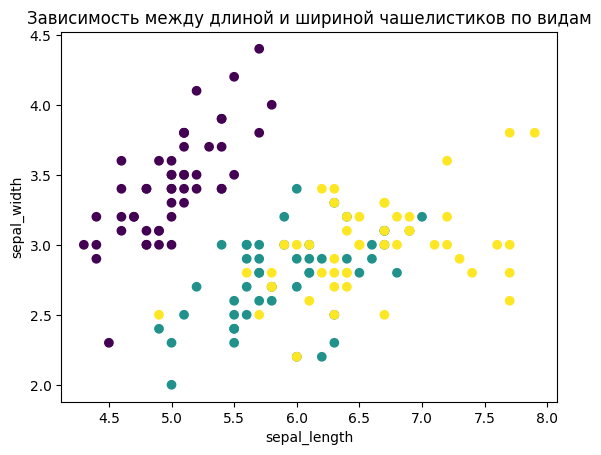

In [ ]:
plt.scatter(df[['sepal_length']].collect(), df[['sepal_width']].collect(), c=df[['variety_num']].collect())
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.title('Зависимость между длиной и шириной чашелистиков по видам')
plt.show()

## Выведите по аналогии график petal_length и petal_width, так же раскрашенный по типам цветков

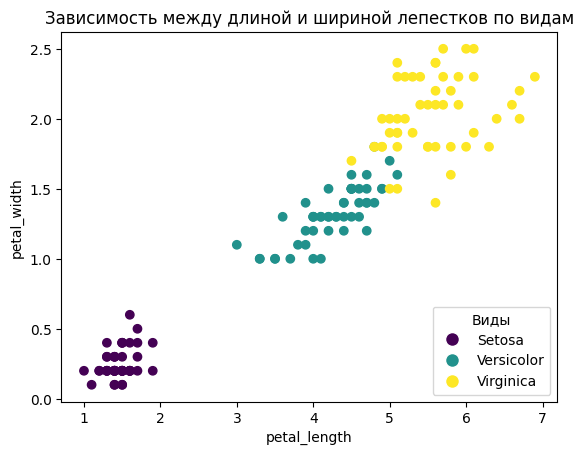

In [ ]:
plt.scatter(df[['petal_length']].collect(), df[['petal_width']].collect(), c=df[['variety_num']].collect())
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.title('Зависимость между длиной и шириной лепестков по видам')

variety_labels = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
handles = [plt.Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=plt.cm.viridis(i / 2), markersize=10)
           for i in variety_labels.keys()]
labels = [variety_labels[i] for i in variety_labels.keys()]
plt.legend(handles, labels, title="Виды", loc="lower right")

plt.show()

## Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)
## При помощи команд withColumn, when, otherwise создайте в датафрейме новую колонку с таким предсказанием

In [ ]:
from pyspark.sql import functions as F

In [ ]:
# Создаем новую колонку 'prediction' с предсказанием
df_with_prediction = df.withColumn(
    "prediction",
    F.when(df["petal_length"] < 2, "Setosa")  # Если petal_length < 2, то "Setosa"
     .otherwise("Other")                     # Иначе "Other"
)

# Фильтруем данные, где petal_length < 2
filtered_df = df_with_prediction.filter(df_with_prediction["petal_length"] < 2)

# Показываем результат
filtered_df.show(5)

+------------+-----------+------------+-----------+-------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|variety|variety_num|prediction|
+------------+-----------+------------+-----------+-------+-----------+----------+
|         5.1|        3.5|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|          0|    Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|          0|    Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|          0|    Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|          0|    Setosa|
+------------+-----------+------------+-----------+-------+-----------+----------+
only showing top 5 rows



## Проверьте качество своего предсказания
Для этого:
1. Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный класс был так же Setosa
2. Подсчитайте количество строк, где Вы предскзали класс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" - !=)

In [ ]:
# Количество строк, где предсказание и правильный класс равны "Setosa"
correct_setosa_count = df_with_prediction.filter(
    (df_with_prediction["prediction"] == "Setosa") &
    (df_with_prediction["variety"] == "Setosa")
).count()

print(f"Количество правильных предсказаний Setosa: {correct_setosa_count}")

Количество правильных предсказаний Setosa: 50


In [ ]:
# Количество строк, где предсказание "Setosa", но правильный класс другой
incorrect_setosa_count = df_with_prediction.filter(
    (df_with_prediction["prediction"] == "Setosa") &
    (df_with_prediction["variety"] != "Setosa")
).count()

print(f"Количество неправильных предсказаний Setosa: {incorrect_setosa_count}")

Количество неправильных предсказаний Setosa: 0


In [ ]:
# Подсчитываем количество неправильных предсказаний Setosa
incorrect_setosa_count = df_with_prediction.filter(
    (df_with_prediction["prediction"] == "Setosa") &
    (df_with_prediction["variety"] != "Setosa")
).count()

# Выводим результаты
print(f"Количество правильных предсказаний Setosa: {correct_setosa_count}")
print(f"Количество неправильных предсказаний Setosa: {incorrect_setosa_count}")

Количество правильных предсказаний Setosa: 50
Количество неправильных предсказаний Setosa: 0
